# Лабораторная работа №2
## Визуальный анализ данных

### Подключение библиотек

In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [153]:
data_path = "/content/diamonds1.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    387 non-null    float64
 1   cut      387 non-null    object 
 2   color    387 non-null    object 
 3   clarity  387 non-null    object 
 4   depth    387 non-null    float64
 5   table    387 non-null    float64
 6   price    387 non-null    int64  
 7   x        387 non-null    float64
 8   y        387 non-null    float64
 9   z        387 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 30.4+ KB


### Одиночные признаки
#### Количественные признаки

In [155]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

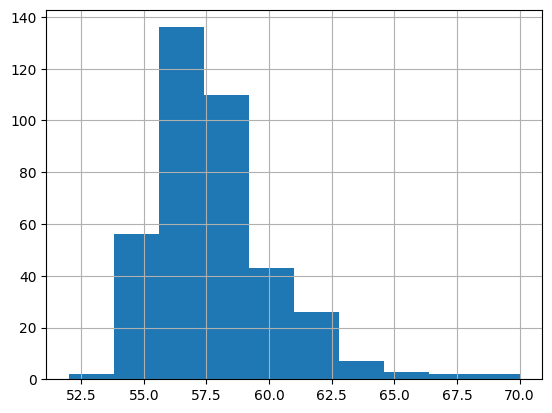

In [156]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data["table"].hist();

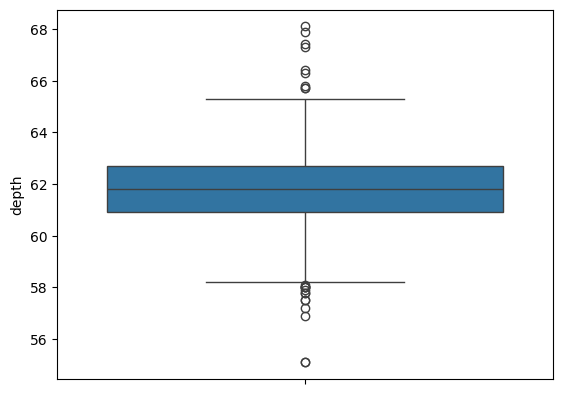

In [157]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['depth']);

<ipython-input-158-d9ff2584dacf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='price',


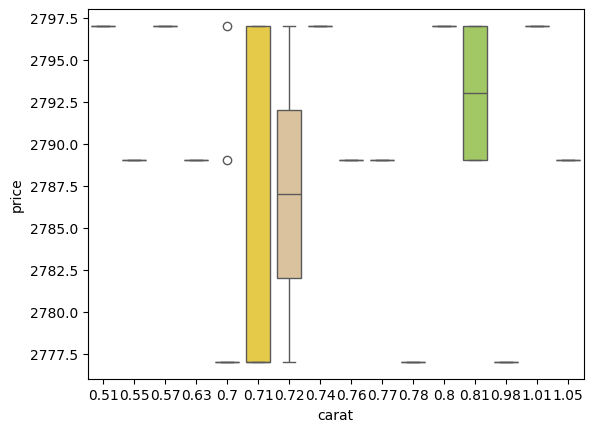

In [158]:
top_data = data[['price','carat']]
top_data = top_data.groupby('price').sum()
top_data = top_data.sort_values('carat',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='price',
            x='carat',
            data=data[data.price.isin(top_data)], palette='Set2');

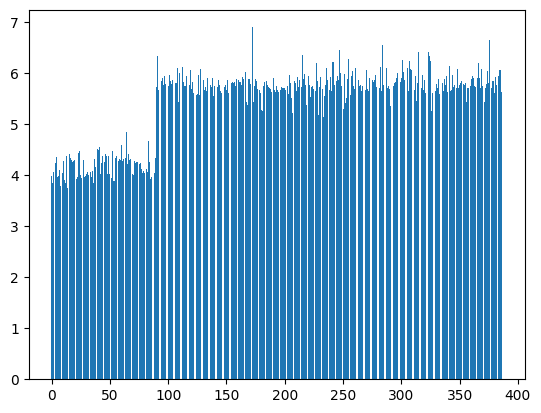

In [159]:
plt.bar(data.index, data['y'])
plt.show()

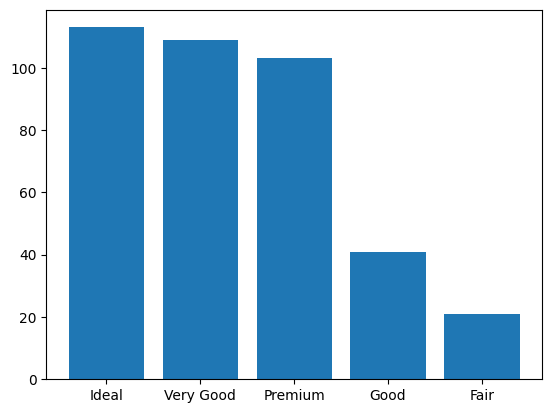

In [160]:
hist = data['cut'].value_counts()
plt.bar(hist.index, hist);

In [161]:
# jn,jh ghbpyfrjd
feats=[f for f in data.columns if 'c' in f]
feats

['carat', 'cut', 'color', 'clarity', 'price']

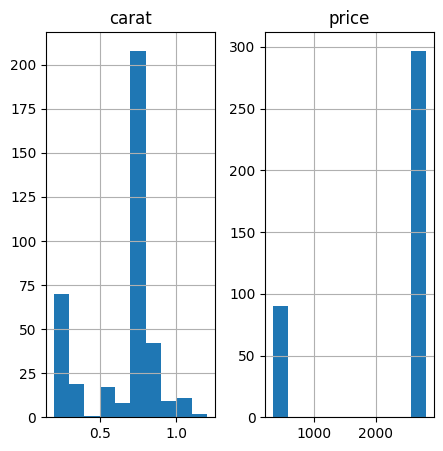

In [162]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

### Категориальные признаки

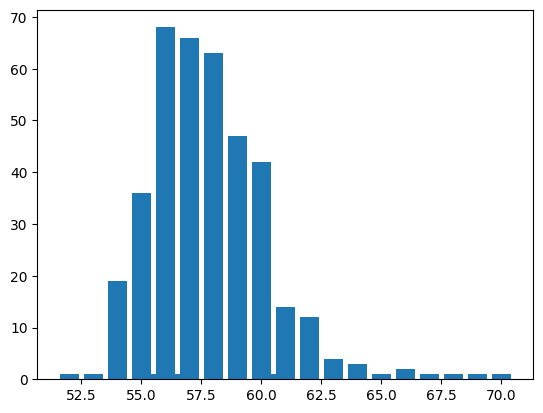

In [163]:
# определение первых n "популярных" штатов
# data['State'].value_counts().head(10)
hist = data['table'].value_counts()
plt.bar(hist.index, hist);


In [164]:
# фактически бинарный признак
data['cut'].value_counts()

cut
Ideal        113
Very Good    109
Premium      103
Good          41
Fair          21
Name: count, dtype: int64

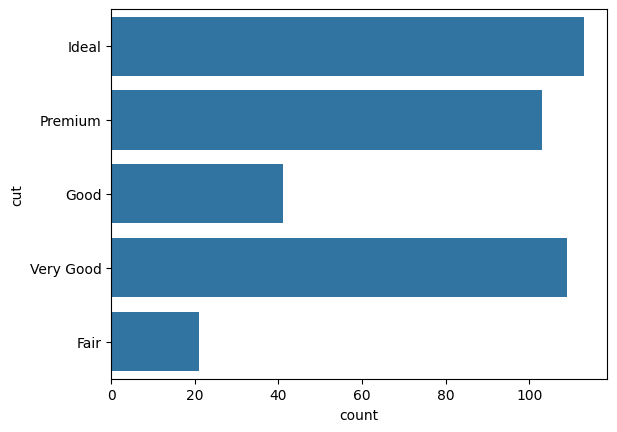

In [165]:
sns.countplot(data['cut']);

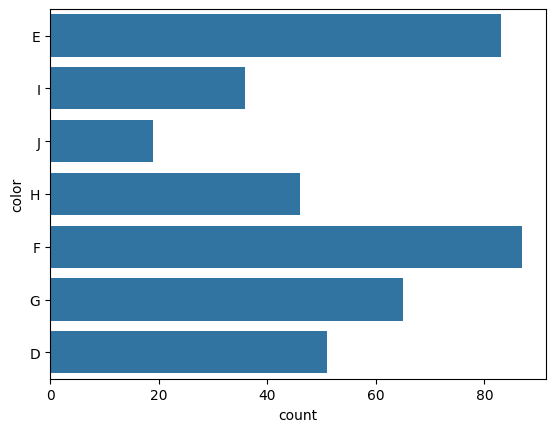

In [166]:
# гистограмма для всех штатов
sns.countplot(data['color']);

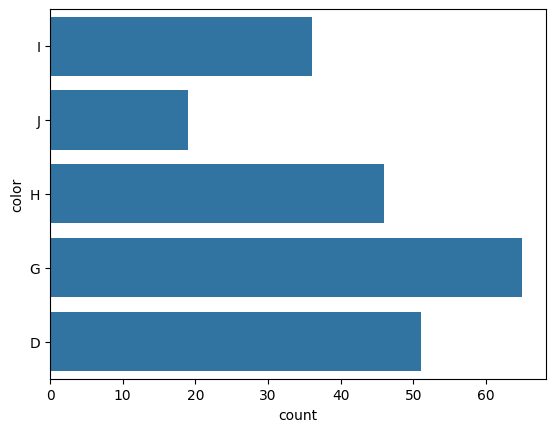

In [167]:
# гистограмма "популярных" штатов
sns.countplot(data[data['color'].isin(data['color'].value_counts().tail(5).index)]['color']);

### Взаимосвязанные признаки
#### Количественный - количественный

In [168]:
# список колонок
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [169]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'c' in f]
len(feats)
# feats=['Total day calls', 'Total day charge']

5

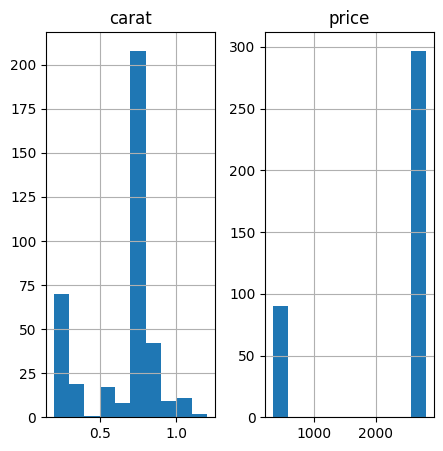

In [170]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

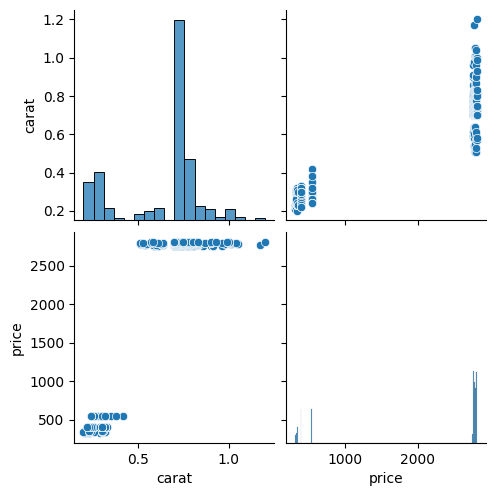

In [171]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

Можно строить более сложные попарные распределения признаков

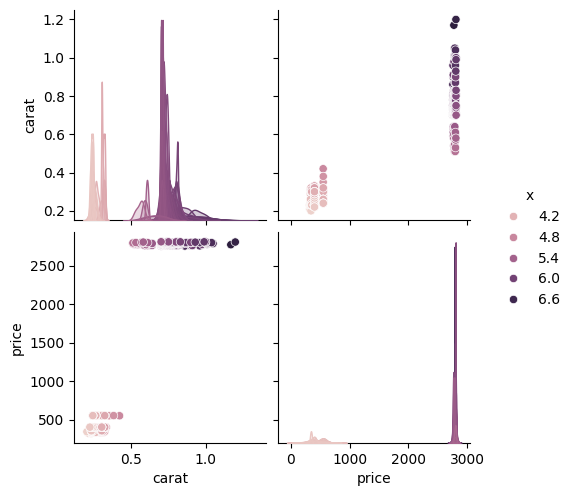

In [172]:
sns.pairplot(data[feats + ['x']], hue='x');

Использование matplotlib, подписей данных, заголовков
Использование простейших пользовательских цветов

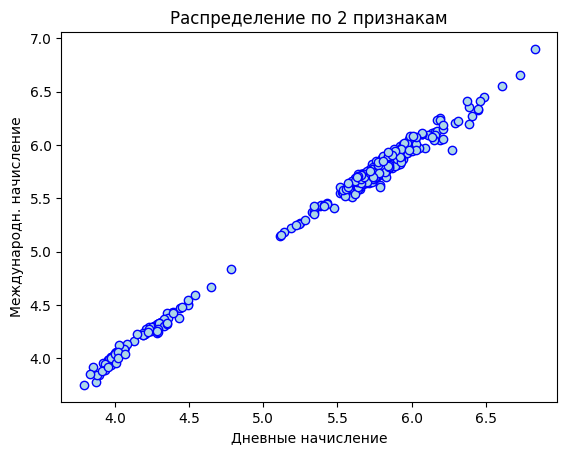

In [173]:
plt.scatter(data['x'],
            data['y'],
            color='lightblue', edgecolors='blue')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение по 2 признакам');

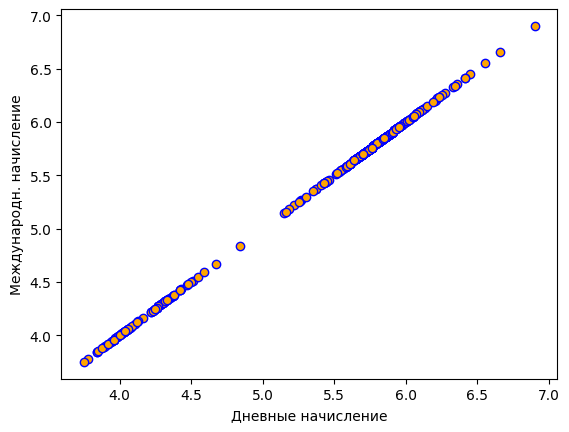

In [174]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['clarity'].map({False: 'lightblue', True: 'orange'})
edge_c = data['clarity'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['y'], data['y'],
            color='orange', edgecolors='blue'
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление');

### Корреляция признаков

В реальных задачах анализ такой матрицы затруднен,
необходимо или автоматизировать (скрипты), или визуализировать (графики)

In [145]:
# Удаление коррелирующих признаков
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['depth', 'table', 'x', 'y', 'z'], dtype='object')

Перестраиваем heatmap без коррелирующих признаков

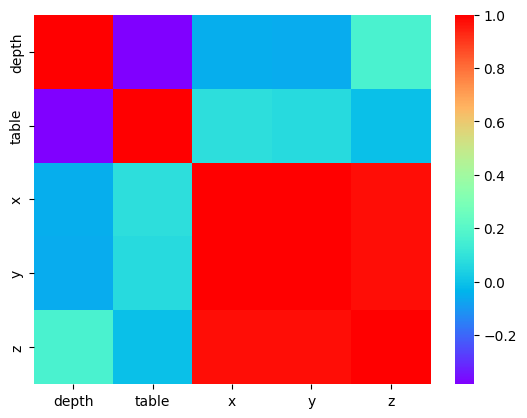

In [146]:
sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);